## Background information
Oil and gas reservoirs lie deep beneath the Earth's surface. Geologists and engineers cannot examine the rock formations in situ, so tools called sondes go there for them. Specialists lower these tools into a wellbore and obtain measurements of subsurface properties. The data are displayed as a series of measurements covering a depth range in a display called a well log. Often, several tools are run simultaneously as a logging string, and the combination of results is more informative than each individual measurement(https://www.slb.com/resource-library/oilfield-review/defining-series/defining-logging).

## Objective
Train a Machine Learning model to predict lithology using log measurements from two different geothermal wells.

## Data Source
https://gdr.openei.org/submissions/1111 

Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
We'll work with the Well_Data.csv. It has numerical value columns:

DENS: Density log
GR: Gamma ray log
SP: Spontaneous log
DEEP_RES: Deep Resistivity log
CAL: Caliper log

In [3]:
df = pd.read_csv('Well_Data.csv')
df.head()

,DENS,GR,SP,DEEP_RES,CAL,Lithology
0,2.5552,159.1349,82.500,1950.000,8.8111,Granitiod
1,2.0330,152.9230,-3.054,4.121,10.2130,Granitiod
2,2.5360,148.3970,3.369,2.099,14.7900,Granitiod
3,2.2640,154.8470,-2.059,1.265,12.4940,Granitiod
4,3.9170,72.0860,3.696,5.645,10.2000,Granitiod


In [4]:
df.describe()

,DENS,GR,SP,DEEP_RES,CAL
count,28584.000000,30399.000000,30410.000000,30410.000000,30410.000000
mean,2.642602,142.226313,19.129150,173.825669,10.136536
std,0.460718,54.432473,48.371447,382.208613,3.122901
min,1.656000,20.493500,-181.250000,0.272000,3.237500
25%,2.376000,99.365000,-0.565000,2.410000,8.883500
50%,2.556150,144.720000,3.194700,7.981850,10.186400
75%,2.660000,171.758600,47.500000,93.990850,12.463000
max,4.628800,641.089700,172.656300,1986.700000,16.580300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30410 entries, 0 to 30409
Data columns (total 6 columns):
DENS         28584 non-null float64
GR           30399 non-null float64
SP           30410 non-null float64
DEEP_RES     30410 non-null float64
CAL          30410 non-null float64
Lithology    30410 non-null object
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


## Clean Data
Delete rows with null value

In [6]:
df.isnull().sum()

DENS         1826
GR             11
SP              0
DEEP_RES        0
CAL             0
Lithology       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28573 entries, 0 to 30409
Data columns (total 6 columns):
DENS         28573 non-null float64
GR           28573 non-null float64
SP           28573 non-null float64
DEEP_RES     28573 non-null float64
CAL          28573 non-null float64
Lithology    28573 non-null object
dtypes: float64(5), object(1)
memory usage: 1.5+ MB


In [9]:
df.isnull().sum()

DENS         0
GR           0
SP           0
DEEP_RES     0
CAL          0
Lithology    0
dtype: int64

## Data Visualization

In [8]:
df.columns

Index(['DENS', 'GR', 'SP', 'DEEP_RES', 'CAL', 'Lithology'], dtype='object')

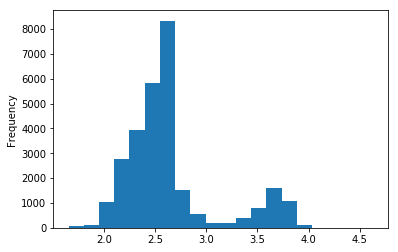

In [23]:
df['DENS'].plot(kind='hist', bins=20)

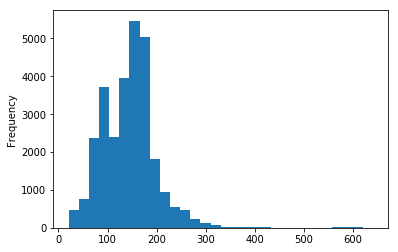

In [25]:
df['GR'].plot(kind='hist', bins=30)

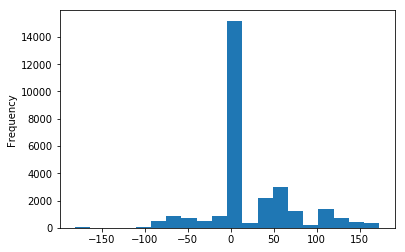

In [27]:
df['SP'].plot(kind='hist', bins=20)

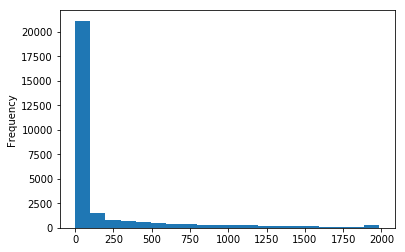

In [28]:
df['DEEP_RES'].plot(kind='hist', bins=20)

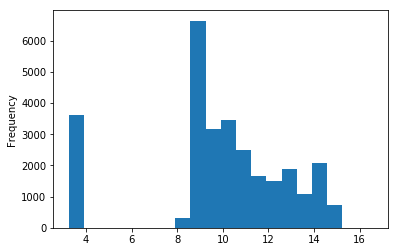

In [29]:
df['CAL'].plot(kind='hist', bins=20)

## Data Training and Testing

### Standardize
Standardize features by removing the mean and scaling to unit variance

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [83]:
scaler.fit(df.drop('Lithology',axis=1))   ## Lithology is the target values
scaled_features = scaler.transform(df.drop('Lithology',axis=1))

In [84]:
df_std = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_std.head()

,DENS,GR,SP,DEEP_RES,CAL
0,-0.189932,0.275079,1.252179,4.506197,-0.355852
1,-1.323272,0.161960,-0.470464,-0.461606,0.103175
2,-0.231602,0.079541,-0.341136,-0.466768,1.601830
3,-0.821929,0.196996,-0.450429,-0.468898,0.850047
4,2.765607,-1.310090,-0.334552,-0.457716,0.098918


### Splitting and Training

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x = df.drop('Lithology',axis=1)
y = df['Lithology']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

### Training on KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

### Visiualizing K-value

Text(0, 0.5, 'Error Rate')

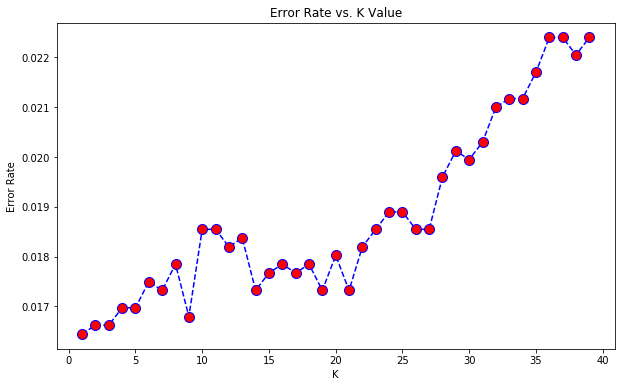

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K = 3 has the min. error rate

### Testing on KNN

In [73]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [74]:
knn_3.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [75]:
y_p_3 = knn_3.predict(x_test)

In [81]:
print('Sample=0.8, K=3')
print('\n')
print(confusion_matrix(y_test,y_p_3))
print('\n')
print(classification_report(y_test,y_p_3))

Sample=0.8, K=3


[[ 465   59]
 [  36 5155]]


              precision    recall  f1-score   support

  Basin Fill       0.93      0.89      0.91       524
   Granitiod       0.99      0.99      0.99      5191

   micro avg       0.98      0.98      0.98      5715
   macro avg       0.96      0.94      0.95      5715
weighted avg       0.98      0.98      0.98      5715

